任务：基于zgpa_train.csv数据，建立RNN模型，预测股价  
1.完成数据预处理，将序列数据转化为可用于RNN输入的数据  
2.对新数据zgpa_test.csv进行预测，可视化结果  
3.存储预测结果，并观察局部预测结果  
备注：模型结构：单层RNN，输出有五个神经元：每次使用前8数据预测第9个数据  

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('zgpa_train.csv')
data.head() #读取文件前几个数据

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [2]:
price = data.loc[:,'close'] #data.loc[row_label, column_label] 选择close这一列的内容
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

<h1>归一化处理</h1>

In [3]:
mean = np.mean(price)
std_dev = np.std(price)
price_norm = (price - mean) / std_dev
print(price_norm)

0     -1.017065
1     -0.989001
2     -0.987130
3     -1.034527
4     -1.023925
         ...   
726    0.705435
727    0.702940
728    0.646189
729    0.621243
730    0.571352
Name: close, Length: 731, dtype: float64


<h1>可视化</h1>

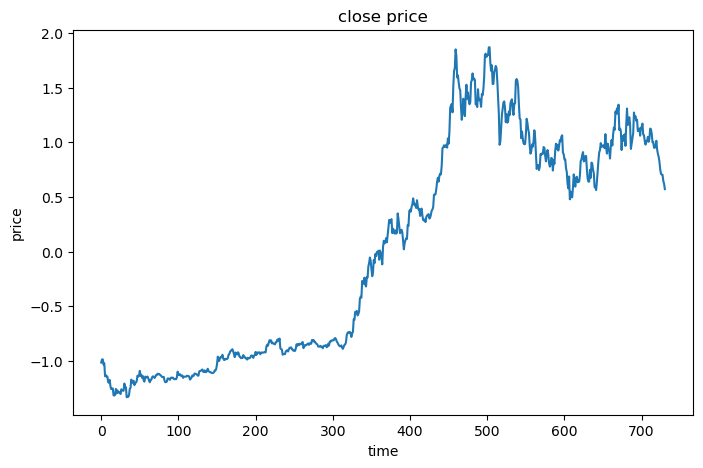

In [4]:
#jupyter魔术命令，可视化
%matplotlib inline 
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize = (8,5)) # 创建一个具有指定大小的图形对象
plt.plot(price_norm) #归一化之后的样子，若要归一化之前的样子则(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

<h1>数据预处理</h1>

data[i:i+time_step]：表示从data列表中索引i到i+time_step-1之间的元素切片.  
[a for a in data[i:i+time_step]]：使用列表推导式，遍历切片中的每个元素，并将它们添加到新的列表中.  
x.append([a for a in data[i:i+time_step]])：将生成的列表作为一个整体添加到列表x的末尾.  

In [5]:
#define x,y
#difine method to extract X and Y 让他适合RNN输入序列
#0,1,2,3,4,5,6,7,8,9:10个样本; time_step = 8; 0,1,2,3,4,5,6,7(第一组); 1,2,3,4,5,6,7,8(第二组); 
#2,3,4,5,6,7,8,9(没有需要预测的数据，因此不算做一组样本); 因此一共只有2组样本
#y是目标值，是一维数组，但是x需要进行转化
def convert_data(data,time_step):
    x = []
    y = []
    for i in range(len(data) - time_step): #731 - 8 = 723 一共两组样本
        x.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    x = np.array(x) #将x转换为数组
    x = x.reshape(x.shape[0],x.shape[1],1)   # x有三个维度：样本数, time_step, 数组本身的维度
    y = np.array(y)
    return x,y

In [6]:
time_step = 8
x,y = convert_data(price_norm,time_step)
print(x.shape) 

(723, 8, 1)


723代表我有723个样本，8代表每个样本里有多少个数据点，1代表每个数据点就是单独的一个数值（每个时间步中有1个特征维度的数据）

In [7]:
print(x[0,:])#打印第一个样本，选择了第一个样本的所有时间步和所有特征维度的值。

[[-1.01706492]
 [-0.98900102]
 [-0.98713009]
 [-1.0345269 ]
 [-1.02392498]
 [-1.14304065]
 [-1.13181509]
 [-1.14553522]]


In [8]:
print(y)

[-1.14553522 -1.19480295 -1.2029103  -1.17547004 -1.23658698 -1.26028538
 -1.25591989 -1.25342532 -1.31766047 -1.31828411 -1.31329497 -1.25841446
 -1.2989512  -1.27151095 -1.29209114 -1.28772564 -1.29084385 -1.30518763
 -1.26215631 -1.26714545 -1.2752528  -1.27462916 -1.20914672 -1.23845791
 -1.24407069 -1.33449881 -1.32576782 -1.3313806  -1.31578954 -1.25841446
 -1.24594161 -1.17297547 -1.20415758 -1.18856653 -1.18357739 -1.22349049
 -1.20478123 -1.20041573 -1.18482468 -1.13680422 -1.14491157 -1.13742787
 -1.09314927 -1.13867515 -1.12869688 -1.15738442 -1.14116972 -1.17858825
 -1.19168474 -1.14553522 -1.15676078 -1.14990071 -1.14491157 -1.16112627
 -1.18420103 -1.19729752 -1.17547004 -1.17297547 -1.15052435 -1.14366429
 -1.14553522 -1.15800806 -1.14927707 -1.13181509 -1.13119144 -1.1187186
 -1.12495502 -1.12058953 -1.12869688 -1.13306237 -1.142417   -1.15052435
 -1.14927707 -1.14802978 -1.18233011 -1.19729752 -1.19542659 -1.19168474
 -1.1629972  -1.16237356 -1.16923362 -1.17547004 -1.

<h1>Set up model</h1>
激活函数'RELU':当输入x大于等于0时，输出为x本身；当输入x小于0时，输出为0
    
定义神经元为5的的RNN模型，这里不需要样本数了，所以只有2个维度

进行回归预测时，直接用linear而不是用softmax和sigmoid
 
 

In [9]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential() #实例
# add RNN layer
model.add(SimpleRNN(units = 5, input_shape = (time_step, 1),activation = 'relu')) 
# add output layer (output:y)
model.add(Dense(units = 1, activation = 'linear')) # 输出的维度为1; 线性激活函数就是 f(x) = x
#config model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h1>模型训练</h1>
batch_size：批处理大小，表示每次迭代使用的样本数量。在训练过程中，模型会根据这个值将数据分成多个小批次进行训练。

epochs：训练轮数，表示模型将遍历整个数据集的次数。

model.fit() 方法通过传入输入数据和对应的目标数据来训练模型。它会根据指定的批处理大小和训练轮数，
按照一定的顺序和算法来更新模型的权重，以使模型能够逐渐拟合输入数据和目标数据之间的关系。
训练过程中，模型会根据损失函数计算预测结果与真实结果之间的差异，并通过反向传播来调整权重。

在每个训练轮次中，模型会将数据集划分为多个小批次（每批次大小为batch_size），并使用梯度下降算法来优化模型。
一个完整的数据集被遍历一次称为一个训练轮次（epoch），而多个训练轮次的迭代则可以更好地拟合数据集。

In [10]:
# modify sample
print(x.shape[0],len(y))

723 723


In [20]:
#train model
model.fit(x,y,batch_size = 30,epochs = 200)

Epoch 1/200
25/25 [==============================] - 0s 863us/step - loss: 0.0039
Epoch 2/200
25/25 [==============================] - 0s 900us/step - loss: 0.0039
Epoch 3/200
25/25 [==============================] - 0s 960us/step - loss: 0.0038
Epoch 4/200
25/25 [==============================] - 0s 941us/step - loss: 0.0039
Epoch 5/200
25/25 [==============================] - 0s 926us/step - loss: 0.0038
Epoch 6/200
25/25 [==============================] - 0s 838us/step - loss: 0.0039
Epoch 7/200
25/25 [==============================] - 0s 896us/step - loss: 0.0038
Epoch 8/200
25/25 [==============================] - 0s 842us/step - loss: 0.0038
Epoch 9/200
25/25 [==============================] - 0s 864us/step - loss: 0.0040
Epoch 10/200
25/25 [==============================] - 0s 839us/step - loss: 0.0038
Epoch 11/200
25/25 [==============================] - 0s 897us/step - loss: 0.0039
Epoch 12/200
25/25 [==============================] - 0s 860us/step - loss: 0.0038
Epoch 13/200


25/25 [==============================] - 0s 846us/step - loss: 0.0037
Epoch 100/200
25/25 [==============================] - 0s 843us/step - loss: 0.0037
Epoch 101/200
25/25 [==============================] - 0s 859us/step - loss: 0.0037
Epoch 102/200
25/25 [==============================] - 0s 814us/step - loss: 0.0037
Epoch 103/200
25/25 [==============================] - 0s 856us/step - loss: 0.0037
Epoch 104/200
25/25 [==============================] - 0s 845us/step - loss: 0.0037
Epoch 105/200
25/25 [==============================] - 0s 810us/step - loss: 0.0037
Epoch 106/200
25/25 [==============================] - 0s 794us/step - loss: 0.0038
Epoch 107/200
25/25 [==============================] - 0s 833us/step - loss: 0.0036
Epoch 108/200
25/25 [==============================] - 0s 791us/step - loss: 0.0036
Epoch 109/200
25/25 [==============================] - 0s 807us/step - loss: 0.0036
Epoch 110/200
25/25 [==============================] - 0s 814us/step - loss: 0.0037
Epoch 

25/25 [==============================] - 0s 793us/step - loss: 0.0037
Epoch 197/200
25/25 [==============================] - 0s 840us/step - loss: 0.0039
Epoch 198/200
25/25 [==============================] - 0s 822us/step - loss: 0.0036
Epoch 199/200
25/25 [==============================] - 0s 806us/step - loss: 0.0036
Epoch 200/200
25/25 [==============================] - 0s 819us/step - loss: 0.0036


<h1>可视化预测结果</h1>

In [12]:
# predict on training data
y_train_predict = model.predict(x) * std_dev + mean #之前x归一化过，则需要反归一化
y_train = y * std_dev + mean
print(y_train_predict) #y的预测值

23/23 [==============================] - 0s 640us/step
[[27.025297]
 [27.01809 ]
 [26.346964]
 [26.214682]
 [26.261425]
 [25.649961]
 [25.372602]
 [25.194036]
 [25.138021]
 [24.4463  ]
 [24.356928]
 [24.183706]
 [24.704123]
 [24.317307]
 [24.712847]
 [24.41187 ]
 [24.566628]
 [24.445795]
 [24.356216]
 [24.718985]
 [24.686478]
 [24.718426]
 [24.701706]
 [25.370192]
 [25.141674]
 [25.275202]
 [24.291864]
 [24.319016]
 [23.956228]
 [24.11908 ]
 [24.584927]
 [24.819662]
 [25.735115]
 [25.55782 ]
 [25.98922 ]
 [25.98674 ]
 [25.745644]
 [25.869873]
 [25.855783]
 [26.04841 ]
 [26.52839 ]
 [26.573172]
 [26.783697]
 [27.248528]
 [26.922325]
 [27.112059]
 [26.735018]
 [26.923004]
 [26.437765]
 [26.334108]
 [26.61401 ]
 [26.522375]
 [26.667725]
 [26.695864]
 [26.593868]
 [26.348698]
 [26.170887]
 [26.29234 ]
 [26.277622]
 [26.54385 ]
 [26.631226]
 [26.707478]
 [26.609276]
 [26.71339 ]
 [26.863527]
 [26.919678]
 [27.089735]
 [27.058876]
 [27.148943]
 [27.062922]
 [27.042963]
 [26.913294]
 [26.8160

In [13]:
print(y_train) #y在训练集中的真实值

[26.72 25.93 25.8  26.24 25.26 24.88 24.95 24.99 23.96 23.95 24.03 24.91
 24.26 24.7  24.37 24.44 24.39 24.16 24.85 24.77 24.64 24.65 25.7  25.23
 25.14 23.69 23.83 23.74 23.99 24.91 25.11 26.28 25.78 26.03 26.11 25.47
 25.77 25.84 26.09 26.86 26.73 26.85 27.56 26.83 26.99 26.53 26.79 26.19
 25.98 26.72 26.54 26.65 26.73 26.47 26.1  25.89 26.24 26.28 26.64 26.75
 26.72 26.52 26.66 26.94 26.95 27.15 27.05 27.12 26.99 26.92 26.77 26.64
 26.66 26.68 26.13 25.89 25.92 25.98 26.44 26.45 26.34 26.24 26.54 26.56
 26.55 26.56 26.37 26.34 26.36 26.33 26.64 27.45 27.02 26.94 27.07 26.84
 26.87 26.88 26.53 26.71 26.71 26.7  26.71 26.85 26.79 26.81 26.73 26.28
 26.41 26.58 26.89 26.77 26.91 27.17 27.15 27.07 27.03 26.86 26.87 27.49
 27.54 27.57 27.67 27.77 27.46 27.39 27.63 27.38 27.38 27.6  27.87 27.53
 27.45 27.36 27.36 27.26 27.23 27.26 27.35 27.62 27.62 27.87 28.56 29.64
 29.   29.05 29.51 29.6  29.54 29.92 29.41 29.17 29.17 29.34 29.29 29.3
 29.45 29.94 30.04 30.42 30.49 30.66 30.74 30.4  30.

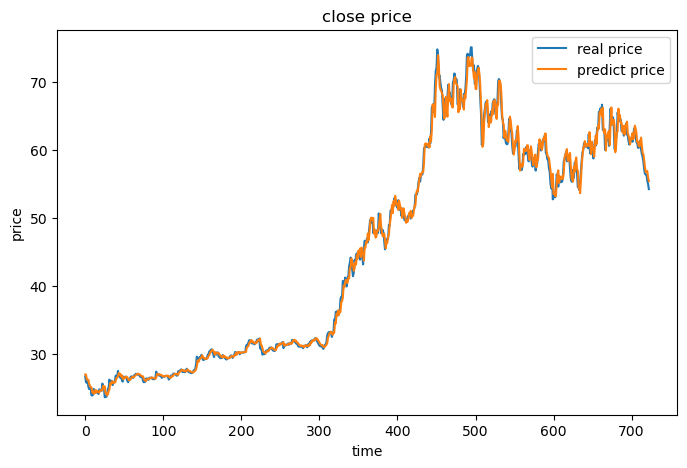

In [14]:
fig2 = plt.figure(figsize = (8,5))
plt.plot(y_train, label = 'real price')
plt.plot(y_train_predict, label ='predict price')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [15]:
#预测测试数据
data_test = pd.read_csv('zgpa_test.csv')
data_test.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,2022-12-09,47.07,47.88,47.60,46.70,709578.88,0.45,0.95,47.234,45.676,43.869,849621.35,914375.63,753374.44,0.66
1,2022-12-08,46.38,47.20,47.15,46.30,448364.06,0.45,0.96,46.638,45.191,43.505,829263.00,903213.72,770229.27,0.41
2,2022-12-07,47.44,47.48,46.70,46.37,831454.75,-0.74,-1.56,46.174,44.656,43.071,911455.49,883284.96,763969.84,0.77
3,2022-12-06,47.28,47.68,47.44,46.74,878273.06,0.16,0.34,45.824,44.163,42.654,978167.71,845101.53,735781.44,0.81
4,2022-12-05,45.55,47.31,47.28,45.35,1380436.00,2.66,5.96,45.292,43.616,42.217,1153154.05,804455.59,710391.92,1.27


In [16]:
price_test = data_test.loc[:,'close']
price_test.head()

0    47.60
1    47.15
2    46.70
3    47.44
4    47.28
Name: close, dtype: float64

In [17]:
#Extract x_test, y_test
price_test_norm = (price_test - mean) / std_dev #与之前用同样的归一化方法，防止预测不准
x_test_norm, y_test_norm = extract_data(price_test_norm, time_step)
print(x_test_norm.shape,len(y_test_norm)) #打印维度

(219, 8, 1) 219


7/7 [==============================] - 0s 500us/step


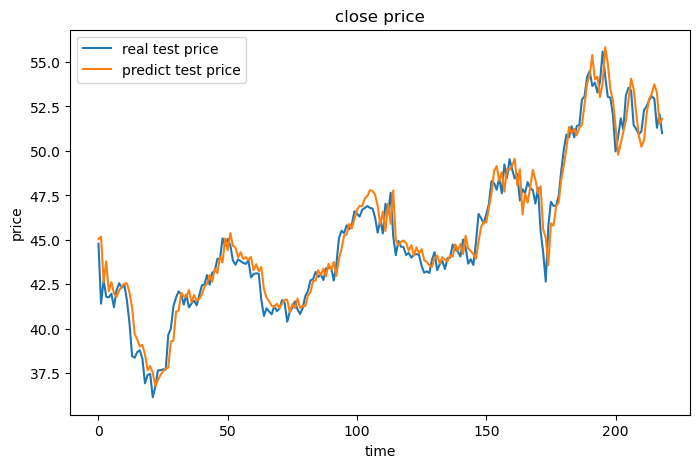

In [18]:
# predict on test data
y_test_predict = model.predict(x_test_norm) * std_dev + mean
y_test = y_test_norm* std_dev + mean
fig3 = plt.figure(figsize = (8,5))
plt.plot(y_test, label = 'real test price')
plt.plot(y_test_predict, label ='predict test price')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

<h1>存储预测结果，并观察局部预测结果</h1>
在局部上有时候在一个时间点下降了，但是预测还在上升，慢了一拍（信息延迟）

In [19]:
#将两个数组 y_test 和 y_test_predict 沿着轴 Axis=1 进行拼接。
result_y_test = y_test.reshape(-1,1) #-1自动计算行数
result_y_test_predict = y_test_predict
result = np.concatenate((result_y_test,result_y_test_predict),axis = 1)
result = pd.DataFrame(result,columns = ['real test price','predict test price'])
result.to_csv('zgpa_predict_test.csv')